<a href="https://colab.research.google.com/github/yagneshmb/Fake_News_Detection_Deep_Learnng/blob/main/hindawi_mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data from excel file

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/mp_hindawi/train.xlsx', 'true_false_data') # can also index sheet by name or fetch all sheets
df.head()

,ID,Label,Statement,Subject,Speaker,Speaker's job title,state info,party affiliation,barely true count,false count,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,2635.json,0.0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1123.json,0.0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12465.json,1.0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5947.json,0.0,When Mitt Romney was governor of Massachusetts...,"history,state-budget",mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,620.json,1.0,McCain opposed a requirement that the governme...,federal-budget,barack-obama,President,Illinois,democrat,70.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get statements and labels

In [ ]:
raw_statement = df['Statement'].tolist()
label = df['Label'].tolist()

#remove last 2 values from the list
raw_statement.remove(raw_statement[4575])
raw_statement.remove(raw_statement[4574])
label.remove(label[4575])
label.remove(label[4574])
print((raw_statement))

['Says the Annies List political group supports third-trimester abortions on demand.', 'Health care reform legislation is likely to mandate free sex change surgeries.', 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.', 'When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.', "McCain opposed a requirement that the government buy American-made motorcycles. And he said all buy-American provisions were quote 'disgraceful.' ", 'Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor.', 'I dont know who (Jonathan Gruber) is.', 'ISIS supporter tweeted at 10:34 a.m. Shooting began at 10:45 a.m. in Chattanooga, Tenn.', 'Says Paul Ryan is still endorsing Trump.', 'What (the Obama administration is) going to come out with in the next several months is youre no

In [ ]:
#make a single string
single_string = " ".join(raw_statement)
print(single_string)

Says the Annies List political group supports third-trimester abortions on demand. Health care reform legislation is likely to mandate free sex change surgeries. The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades. When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it. McCain opposed a requirement that the government buy American-made motorcycles. And he said all buy-American provisions were quote 'disgraceful.'  Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor. I dont know who (Jonathan Gruber) is. ISIS supporter tweeted at 10:34 a.m. Shooting began at 10:45 a.m. in Chattanooga, Tenn. Says Paul Ryan is still endorsing Trump. What (the Obama administration is) going to come out with in the next several months is youre not even going to be able to bu

wordcloud

(-0.5, 999.5, 999.5, -0.5)

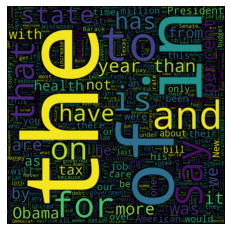

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 1000, max_words=10000, stopwords="~", collocations=False).generate((single_string))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()

In [ ]:

from bs4 import BeautifulSoup
import re 
import sys
def clean_str(news):
  news = re.sub(r"∖∖", "", news)
  news = re.sub(r"'", "", news)
  news = re.sub(r"∖", "", news)
  news = re.sub(r"\’", "", news)
  news = re.sub('\n', "", news)
  #news = re.sub("'open-quote'","", news)
  return news.strip()


statement = []
for idx in range (len(raw_statement)-1):
  text_politi = raw_statement[idx]
  statement.append (clean_str(str(text_politi.encode(), 'utf-8'))) #unicode transformation format 8 bit for representing every character
print(statement) 

['Says the Annies List political group supports third-trimester abortions on demand.', 'Health care reform legislation is likely to mandate free sex change surgeries.', 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.', 'When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.', 'McCain opposed a requirement that the government buy American-made motorcycles. And he said all buy-American provisions were quote disgraceful.', 'Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor.', 'I dont know who (Jonathan Gruber) is.', 'ISIS supporter tweeted at 10:34 a.m. Shooting began at 10:45 a.m. in Chattanooga, Tenn.', 'Says Paul Ryan is still endorsing Trump.', 'What (the Obama administration is) going to come out with in the next several months is youre not e

word_tokenize

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokeize each sentence and store it in a list called tokenized_data
tokenized_data = []
for i in range(len(raw_statement)):
  tokenized_statement =  tokenizer.tokenize(raw_statement[i])
  tokenized_data.append(tokenized_statement)
print(tokenized_data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand'], ['Health', 'care', 'reform', 'legislation', 'is', 'likely', 'to', 'mandate', 'free', 'sex', 'change', 'surgeries'], ['The', 'Chicago', 'Bears', 'have', 'had', 'more', 'starting', 'quarterbacks', 'in', 'the', 'last', '10', 'years', 'than', 'the', 'total', 'number', 'of', 'tenured', 'UW', 'faculty', 'fired', 'during', 'the', 'last', 'two', 'decades'], ['When', 'Mitt', 'Romney', 'was', 'governor', 'of', 'Massachusetts', 'we', 'didnt', 'just', 'slow', 'the', 'rate', 'of', 'growth', 'of', 'our', 'government', 'we', 'actually', 'cut', 'it'], ['McCain', 'opposed', 'a', 'requirement', 'that', 'the', 'government', 'buy', 'American', 'made', 'motorcycles'

stop word removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_remove_data = []
for line in tokenized_data:
  temp_stop_remove_statement = []
  for word in line:
    if(word.lower() not in stop_words):
      temp_stop_remove_statement.append(word)
  stop_remove_data.append(temp_stop_remove_statement)
print(stop_remove_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['Says', 'Annies', 'List', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand'], ['Health', 'care', 'reform', 'legislation', 'likely', 'mandate', 'free', 'sex', 'change', 'surgeries'], ['Chicago', 'Bears', 'starting', 'quarterbacks', 'last', '10', 'years', 'total', 'number', 'tenured', 'UW', 'faculty', 'fired', 'last', 'two', 'decades'], ['Mitt', 'Romney', 'governor', 'Massachusetts', 'didnt', 'slow', 'rate', 'growth', 'government', 'actually', 'cut'], ['McCain', 'opposed', 'requirement', 'government', 'buy', 'American', 'made', 'motorcycles', 'said', 'buy', 'American', 'provisions', 'quote', 'disgraceful'], ['Women', 'men', 'making', 'less', 'adjust', 'inflation', 'John', 'Kitzhaber', 'first', 'elected', 'governor'], ['dont', 'know', 'Jonathan', 'Gruber'], ['ISIS', 'supporter', 'tweeted', '10', '34', 'Shooting', 'began', '10', '45', 'Chattan

wordnet lemmetization

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
  return tag_dict.get(word, wordnet.NOUN)

lemmatized_data = []
lemmatizer = WordNetLemmatizer()
for line in stop_remove_data:
  temp_lemmatized_statement = []
  for word in line:
    temp_lemmatized_statement.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
  lemmatized_data.append(temp_lemmatized_statement)
print(lemmatized_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[['Says', 'Annies', 'List', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand'], ['Health', 'care', 'reform', 'legislation', 'likely', 'mandate', 'free', 'sex', 'change', 'surgery'], ['Chicago', 'Bears', 'starting', 'quarterback', 'last', '10', 'year', 'total', 'number', 'tenured', 'UW', 'faculty', 'fired', 'last', 'two', 'decade'], ['Mitt', 'Romney', 'governor', 'Massachusetts', 'didnt', 'slow', 'rate', 'growth', 'government', 'actually', 'cut'], ['McCain', 'opposed', 'requirement', 'government', 'buy', 'American', 'made', 'motorcycle', 'said', 'buy', 'American', 'provision', 'quote', 'disgraceful'], ['Women', 'men', 'making', 'le', 'adjust', 'inflation', 'John', 'Kitzhaber', 'first', 'elected', 'governor'], ['dont', 'know', 'Jonathan', 'Gruber'], ['ISIS', 'supporter', 'tweet

wordcloud

 Says Annies List political group support third trimester abortion demand Health care reform legislation likely mandate free sex change surgery Chicago Bears starting quarterback last 10 year total number tenured UW faculty fired last two decade Mitt Romney governor Massachusetts didnt slow rate growth government actually cut McCain opposed requirement government buy American made motorcycle said buy American provision quote disgraceful Women men making le adjust inflation John Kitzhaber first elected governor dont know Jonathan Gruber ISIS supporter tweeted 10 34 Shooting began 10 45 Chattanooga Tenn Says Paul Ryan still endorsing Trump Obama administration going come next several month youre even going able burn coal limitedly existing plant federal government think authority regulate toilet seat Austin city basically doubled size every 25 year since founded nuclear test conducted nation time Earth 2 054th nuclear test five permanent member U N Security Council conducted 99 99 percen

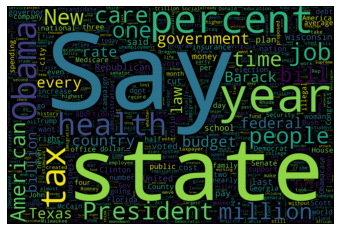

In [ ]:
single_string=""
for line in lemmatized_data:
  for word in line:
    single_string = single_string + " " + word

print(single_string)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000, max_words=10000, collocations=False).generate((single_string))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

wordnet tokennizer

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenize = Tokenizer(num_words = 20000) #20000 max words to keep
tokenize.fit_on_texts(statement) #update the vocabulary if the text is 'the cat is sitting on the floor' then the = 1, cat =2 likewise
sequence = tokenize.texts_to_sequences(statement) #convert texts into sequence of integers

# Get the total number of unique tokens
word_indexes = tokenize.word_index 

print(word_indexes)
print('Number of Unique Tokens',len (word_indexes))

{'the': 1, 'in': 2, 'of': 3, 'to': 4, 'a': 5, 'and': 6, 'says': 7, 'for': 8, 'is': 9, 'that': 10, 'on': 11, 'have': 12, 'has': 13, 'than': 14, 'percent': 15, 'are': 16, 'was': 17, 'we': 18, 'more': 19, 'state': 20, 'by': 21, 'from': 22, 'it': 23, 'not': 24, 'obama': 25, 'health': 26, 'as': 27, 'with': 28, 'tax': 29, 'years': 30, '000': 31, 'our': 32, 'president': 33, 'i': 34, 'he': 35, 'year': 36, 'care': 37, 'at': 38, 'been': 39, 'people': 40, 'states': 41, 'one': 42, 'his': 43, 'this': 44, 'you': 45, 'be': 46, 'an': 47, 'their': 48, 'were': 49, 'u': 50, 'new': 51, 'will': 52, 'would': 53, 's': 54, 'or': 55, 'million': 56, 'jobs': 57, 'over': 58, 'only': 59, 'about': 60, 'they': 61, 'who': 62, 'had': 63, 'all': 64, 'if': 65, 'government': 66, 'every': 67, 'there': 68, 'when': 69, 'no': 70, 'out': 71, 'federal': 72, 'budget': 73, 'bill': 74, 'texas': 75, '1': 76, 'under': 77, 'barack': 78, 'since': 79, 'said': 80, 'billion': 81, 'last': 82, 'now': 83, 'any': 84, 'country': 85, 'law': 8